In [1]:
# importing libries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('candy-data.csv')
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [3]:
df.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [4]:
# picking just a few columns
df = df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard','bar','pluribus','sugarpercent','pricepercent','winpercent','chocolate']]
df.head()

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,chocolate
0,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
2,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
4,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,0


In [5]:
# split the data into train test sets
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df, test_size=0.2)

In [6]:
print(type(trainset))

<class 'pandas.core.frame.DataFrame'>


In [7]:
trainset.head()

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,chocolate
14,1,0,0,0,0,1,0,0,0.732,0.034,39.460556,0
78,1,0,0,0,0,0,0,1,0.313,0.255,47.173229,0
23,0,0,0,0,1,0,1,0,0.430,0.918,62.284481,1
54,0,0,1,0,0,0,0,0,0.988,0.651,72.887901,1
37,0,1,0,1,0,0,1,0,0.732,0.441,60.800701,1


In [8]:
trainset.isnull().sum()

fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
chocolate           0
dtype: int64

In [9]:
# load the values into X_train, y_trian , X_test, y_test
X_train = trainset.iloc[:, :-1] 
y_train = trainset.iloc[:, -1]
X_test = testset.iloc[:, :-1]
y_test = testset.iloc[:, -1] 

In [10]:
# checking the type of the splits
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### Data Exploration

C:\Users\Ephraim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


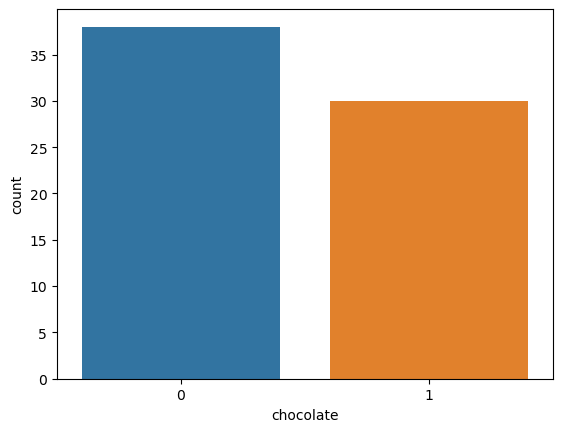

<Figure size 640x480 with 0 Axes>

In [11]:
# the countplot in seaborn is a good way of checking the class count
# it can help us tell is there is class imbalance or the class/labels are balanced
sns.countplot("chocolate", data=trainset)
plt.show()
plt.savefig('count_plot')

In [13]:
## checking the percentage of chocolate and not chocolate
count_not_choco = len(trainset[trainset['chocolate']==0])
count_choco = len(trainset[trainset['chocolate']==1])
percent_of_not_choco = count_not_choco/(count_choco+count_not_choco)
print("Percentage of not chocolate is ", percent_of_not_choco * 100)
percent_of_choco = count_choco/(count_choco+count_not_choco)
print("Percentage of Chocolate is ", percent_of_choco * 100)

Percentage of not chocolate is  55.88235294117647
Percentage of Chocolate is  44.11764705882353


In [14]:
trainset.describe()

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,chocolate
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,0.455882,0.161765,0.161765,0.088235,0.088235,0.161765,0.250000,0.500000,0.459235,0.465515,50.010720,0.441176
std,0.501753,0.370973,0.370973,0.285746,0.285746,0.370973,0.436232,0.503718,0.292023,0.298134,14.273894,0.500219
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.194000,39.174393,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.447500,0.488000,47.501492,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,1.000000,0.732000,0.758000,57.796750,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290,1.000000


### Model deveplopment and prediction

In [16]:
# import sklearn lR module
# fit the train data 
# perform prediction on the test data
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()   # create a logistic regression object
lr.fit(X_train,y_train)     # fiting the lr object into the training set
y_pred =  lr.predict(X_test)  # using the test set to make pre

## evaluation with confusion matrix